# Visualizations for final presentation

In [56]:
# imports here
# native import
import unicodedata

# 3rd party imports
import numpy as np
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt

In [57]:
# load FIFA-19 dataset
# read data on position
# dat = pd.read_csv("/Users/hejinliu/Documents/ECE 143/project/data.csv")
dat = pd.read_csv("/Users/hejinliu/Documents/ECE 143/project/data.csv")
# drop rows with NaN positions
data = dat.dropna(subset=['Position'])
# select best rows per position based on overall
best_rows = data.loc[data.groupby('Position')['Overall'].idxmax()]
# choose only the name, position, overall and photo values
posvals = best_rows[['Name', 'Position', 'Overall', 'Photo']]

In [58]:
# load background image
# img = plt.imread("/Users/hejinliu/Documents/ECE 143/esports_data_analysis/images/Field.png")
img = plt.imread("/Users/hejinliu/Documents/ECE 143/esports_data_analysis/images/Field.png")

### Scatter function: scatter football field positions on background image

In [59]:
def scatter_position(x):
    """
    Function to compute the x and y coordinates on background image given position string

    Arguments:
    x -- str; indicates one of 27 valid positions

    Returns:
    list of x, y location to scatter to
    """
    # weak asserts
    assert isinstance(x, str)
    assert len(x) in [2, 3]
    if len(x) == 2:
        xpos = dict()
        xpos['R'] = 64
        xpos['C'] = 272
        xpos['L'] = 480
        ypos = dict()
        ypos['S'] = 700
        ypos['F'] = 600
        ypos['W'] = 500
        ypos['M'] = 400
        ypos['B'] = 200
        if x == 'ST':
            return [272, 700]
        if x == 'GK':
            return [272, 80]
        return [xpos[x[0]], ypos[x[1]]]
    ypos = dict()
    ypos['AM'] = 500
    ypos['DM'] = 300
    ypos['CM'] = 400
    ypos['CB'] = 200
    ypos['WB'] = 300
    if x[1:] == 'WB':
        if x[0] == 'R':
            return [64, ypos['WB']]
        return [480, ypos['WB']]
    xpos = dict()
    xpos['R'] = 168
    xpos['C'] = 272
    xpos['L'] = 376
    return [xpos[x[0]], ypos[x[1:]]]

In [60]:
# get percentages
plot_x = list()
plot_y = list()
colors = list()
cinds = posvals.index

# set the figure boundaries for at least all the football fields
sn.set(rc={'figure.figsize':(11.7,8.27)})

### Plot positions: 1st visualization of presentation

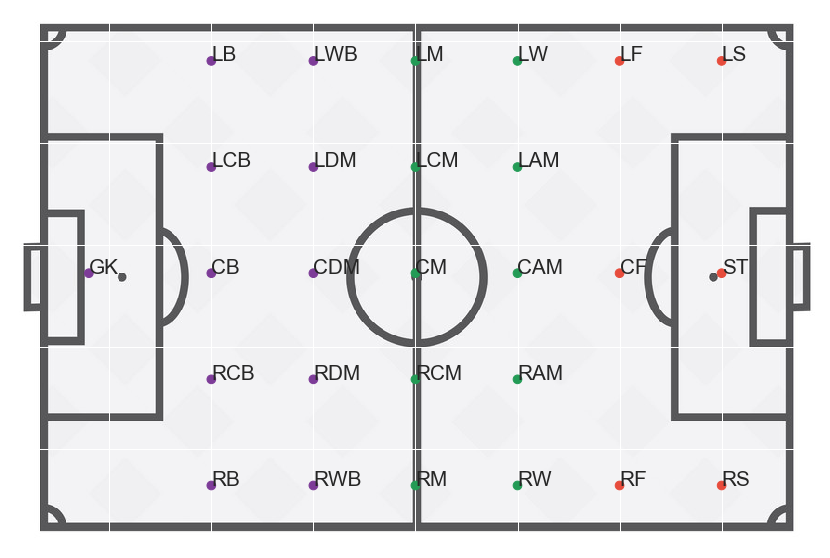

In [61]:
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,800, 0,533])
# find scatter position of each position
for cin in cinds:
    xyl = scatter_position(posvals.loc[cin]['Position'])
    plot_x.append(xyl[1])
    if xyl[1] < 400:
        colors.append('#7d3c98') # purple instead of blue
    elif xyl[1]<600:
        colors.append('#239b56') # green instead of yellow
    else:
        colors.append('#e74c3c') # red instead of firebrick
    plot_y.append(xyl[0])
    ax.annotate("{}".format(posvals.loc[cin]['Position']), (xyl[1], xyl[0]), fontfamily='sans-serif', fontsize='xx-large')
ax.scatter(plot_x, plot_y, color=colors, s=75)
plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        right=False,
        labelleft=False
        )
plt.tight_layout()
plt.show()

### Overview of Dataset

In [7]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Best players for each position

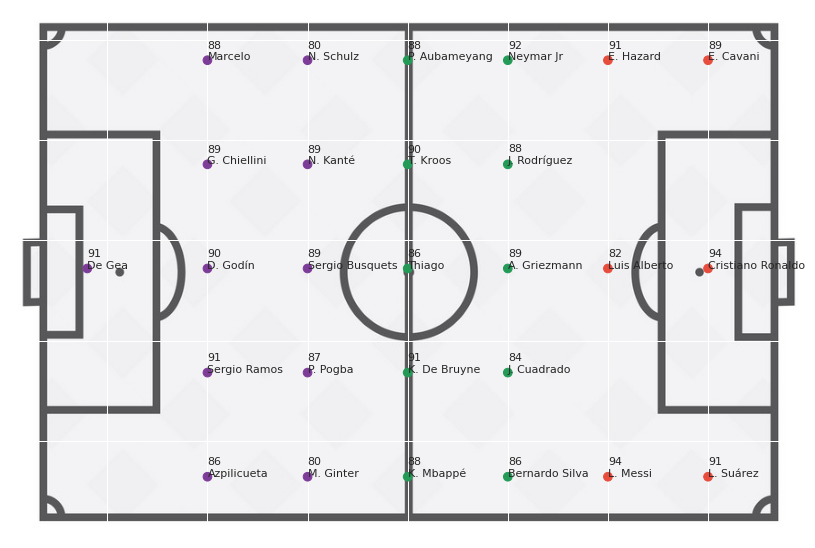

In [8]:
plot_x = list()
plot_y = list()
colors = list()
cinds = posvals.index

fig, ax = plt.subplots()
ax.imshow(img, extent=[0,800, 0,533])

for cin in cinds:
    xyl = scatter_position(posvals.loc[cin]['Position'])
    plot_x.append(xyl[1])
    if xyl[1] < 400:
        colors.append('#7d3c98') # purple instead of blue
    elif xyl[1]<600:
        colors.append('#239b56') # green instead of yellow
    else:
        colors.append('#e74c3c') # red instead of firebrick
    plot_y.append(xyl[0])
    ax.annotate("{}\n{}".format(posvals.loc[cin]['Overall'], posvals.loc[cin]['Name']), (xyl[1], xyl[0]), fontfamily='sans-serif', fontsize=11)
ax.scatter(plot_x, plot_y, color=colors, s=75)
plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        right=False,
        labelleft=False
        )
plt.tight_layout()
plt.show()

### Distribution of players in positions

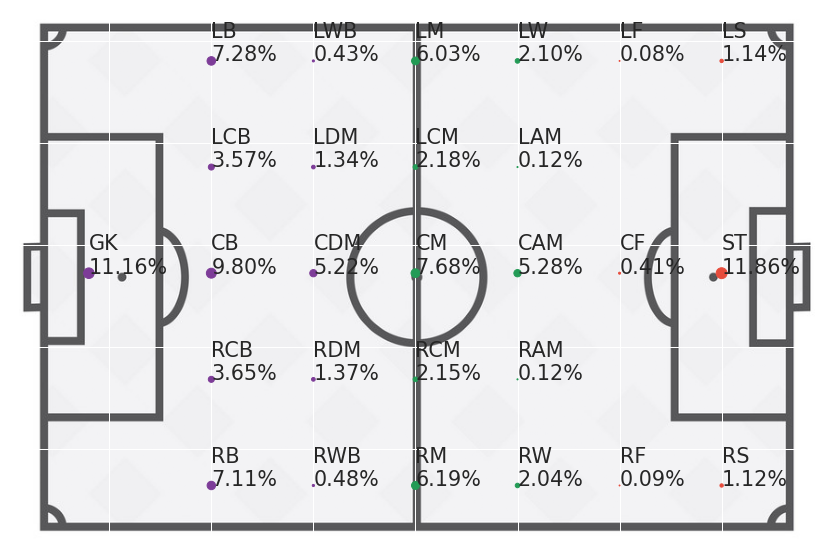

In [9]:
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,800, 0,533])

positions = data['Position']
counts = positions.value_counts(normalize=True)
count_inds = counts.index
cinds = count_inds.values
plot_x = list()
plot_y = list()
markerSizes = list()
colors = list()

for cin in cinds:
    xyl = scatter_position(cin)
    plot_x.append(xyl[1])
    if xyl[1] < 400:
        colors.append('#7d3c98') # purple instead of blue
    elif xyl[1]<600:
        colors.append('#239b56') # green instead of yellow
    else:
        colors.append('#e74c3c') # red instead of firebrick
    plot_y.append(xyl[0])
    markerSizes.append(counts[cin]*1000)
    ax.annotate(cin + "\n{:.2f}%".format(counts[cin]*100.0), (xyl[1], xyl[0]), fontfamily='sans-serif', fontsize='xx-large')
ax.scatter(plot_x, plot_y, color=colors, s=markerSizes)
plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        right=False,
        labelleft=False
        )
plt.tight_layout()
plt.show()

### Distribution over age and rating

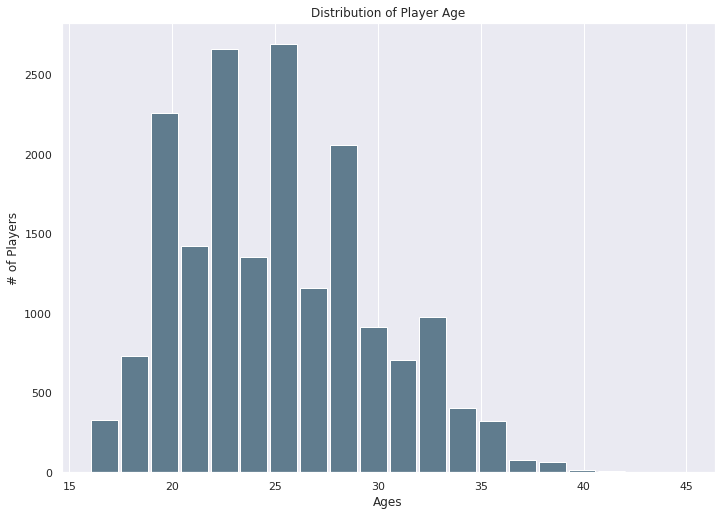

In [10]:
# Generate data on commute times.
size, scale = 1000, 10
age = data['Age']
age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Player Age')
plt.xlabel('Ages')
plt.ylabel('# of Players')
plt.grid(axis='y', alpha=0.75)

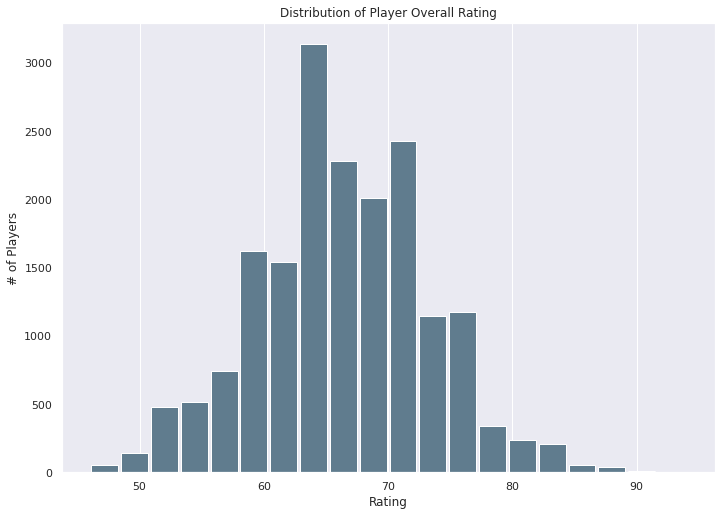

In [11]:
ratings = data['Overall']
ratings.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Player Overall Rating')
plt.xlabel('Rating')
plt.ylabel('# of Players')
plt.grid(axis='y', alpha=0.75)

### Wage vs OVR Correlation

In [12]:
# select the wage column from the data
wages = dat['Wage']

In [13]:
# convert player wages to sensible units
# remove euro sign
wages = wages.apply(lambda x: x[1:])
# convert M and K by their respective multipliers
wages = wages.apply(lambda x: float(x[:-1])*1e6 if "m" in x.lower() else (float(x[:-1])*1000 if "k" in x.lower() else float(x)))

/home/anicodebreaker/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Player Wage vs Player OVR')

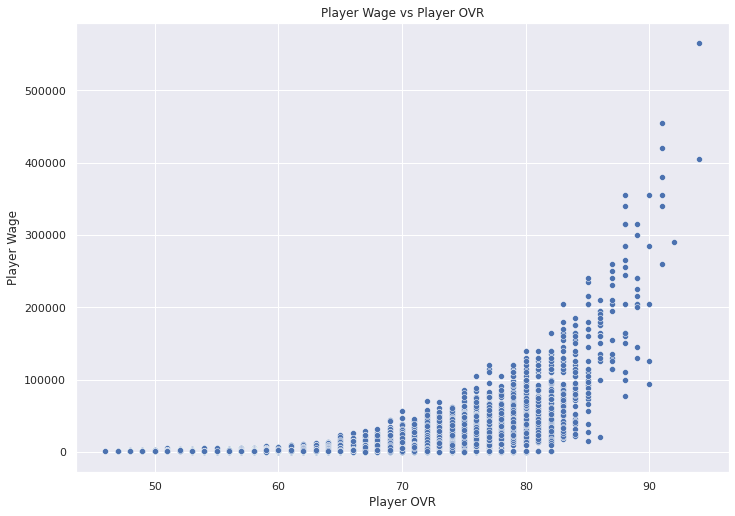

In [14]:
# scatter plot for the correlation
ax = sn.scatterplot(x=dat['Overall'], y=wages)
ytics = ["{}{}K".format(unicodedata.lookup("EURO SIGN"), i*100) for i in range(6)]
ax.set_yticks([i*1e5 for i in range(6)], ytics)
ax.set_xlabel("Player OVR")
ax.set_ylabel("Player Wage")
ax.set_title("Player Wage vs Player OVR")

### Further data cleaning for recommendation purpose

In [63]:
import re
import os

#DATA_DIR = "/Users/hejinliu/Documents/ECE 143/project/data.csv"
DATA_DIR = "/Users/hejinliu/Documents/ECE 143/project/data.csv"
dat=pd.read_csv(DATA_DIR,encoding='utf-8')
dat = dat.drop(dat.columns[0], axis=1)

In [64]:
# Removing spaces in the column names to enable easy column reference  
dat.columns = dat.columns.str.replace(' ','')
# Removing special characters (e.g. euro dollar sign)
euro_sign = dat['ReleaseClause'][0][0]

dat['ReleaseClause'] = dat['ReleaseClause'].str.replace(euro_sign,'')
dat['Value'] = dat['Value'].str.replace(euro_sign,'')
dat['Wage'] = dat['Wage'].str.replace(euro_sign,'')
dat['ReleaseClause'] = dat['ReleaseClause'].str.replace('M','') # Removing Millions in the field
dat['Value'] = dat['Value'].str.replace('M','') # Removing Millions in the field
dat['Wage'] = dat['Wage'].str.replace('K','') # Removing Thousands in the field

# Converting wages,release clause, value from string into integers/float
dat.ReleaseClause = pd.to_numeric(dat.ReleaseClause, errors='coerce')
dat.Value = pd.to_numeric(dat.Value, errors='coerce')
dat.Wage = pd.to_numeric(dat.Wage, errors='coerce')
dat.Age = pd.to_numeric(dat.Age, errors='coerce')

# Converting Weight from string into integers/float
dat['Weight'] = dat['Weight'].str.replace('lbs','') # Removing lbs in the field
dat.Weight = pd.to_numeric(dat.Weight, errors='coerce')
# Use Regular Expression to convert Height from feet + inches into cm. Convert from text into integer
r = re.compile(r"([0-9]+)'([0-9]+)")    # to set the pattern e.g. 5'7 , 4'12 etc
def get_cm(height):
    height = str(height)
    m = r.match(height)
    if m == None:
        return float('NaN')
    else:
        return float(m.group(1))*30.48 + float(m.group(2))*2.54
dat["Height"] = dat["Height"].apply(lambda x:get_cm(x))

In [65]:
# Drop unnecessary columns that are not used for analyzing a player's performance
# This inclues: 'Real Face', 'Jersey Number', 'Loaned From' LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM
# CDM, RDM, RWB LB, LCB, CB, RCB, RB
# dat = dat.drop(dat.columns[27:53], axis = 1)
dat = dat.drop(labels = ['RealFace','JerseyNumber','LoanedFrom'], axis = 1)
dat.dropna(inplace=True)
for i in range(24, 50):
    dat[dat.columns[i]] = pd.to_numeric(dat[dat.columns[i]].apply(lambda x:x[:-2]))

In [66]:
'''
The equations here require future discussion.
'''
# Develop the FIFA attributes: Pace, Shooting, Passing, Dribbling, Defending, Physical
# Each of these attributes are made up of the following skills (https://www.fifauteam.com/fifa-18-attributes-guide/)
# Pace: Sprint Speed, Acceleration
# Shooting: FINISHING, LONG SHOTS, PENALTIES, POSITIONING, SHOT POWER, VOLLEYS
# PASSING: CROSSING, CURVE, FREE KICK, LONG PASSING, SHORT PASSING, VISION
# DRIBBLING: AGILITY, BALANCE, BALL CONTROL, COMPOSURE, DRIBBLING, REACTIONS
# DEFENDING: HEADING, INTERCEPTIONS, MARKING, SLIDING TACKLE, STANDING TACKLE
# PHYSICAL: AGGRESSION, JUMPING, STAMINA, STRENGTH
# GOALKEEPING: DIVING, HANDLING, KICKING, POSITIONING
dat['Pace'] = ( dat['SprintSpeed'] + dat['Acceleration'] ) /2 
dat['Shooting'] = ( dat['Finishing'] + dat['LongShots'] + dat['Penalties'] + dat['Positioning'] + dat['ShotPower'] + dat['Volleys'] ) / 6
dat['Passing'] = ( dat['Crossing'] + dat['Curve'] + dat['FKAccuracy'] + dat['LongPassing'] + dat['ShortPassing'] + dat['Vision'] ) / 6
dat['Dribbling Skill'] = ( dat['HeadingAccuracy'] + dat['Interceptions'] + dat['Marking'] + dat['StandingTackle'] + dat['SlidingTackle'] ) / 5
dat['Physical'] = ( dat['Aggression'] + dat['Jumping'] + dat['Stamina'] + dat['Strength'] ) / 4
dat['Goal Keeping'] = ( dat['GKDiving'] + dat['GKHandling'] + dat['GKKicking'] + dat['GKPositioning'] ) / 4

### Radar plot for player skills analysis

In [67]:
# Function for plotting a radar plot. Taken from (https://stackoverflow.com/questions/52910187/how-to-make-a-polygon-radar-spider-chart-in-python)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=16)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [68]:
def radarPlot(data, save=False, fname=""):
    '''
    Plot the radar plot of skills for input players
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(save, bool)
    assert isinstance(fname, str)
    radar_plot_data = data[['Pace','Shooting','Passing','Dribbling','Physical','Goal Keeping']]
    radar_plot_data  = radar_plot_data.values.tolist()
    
    theta = radar_factory(6, frame='polygon') # Since there are 6 attributes: Pace, Shooting,...,Goal Keeping
    spoke_labels = ['Pace','Shooting','Passing','Dribbling','Physical','Goal Keeping']

    i = 0
    for d in radar_plot_data:
        count = data.index[i]
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(top=0.85, bottom=0.05)
        ax.set_rgrids([0,20,40, 60, 80])
        ax.set_title(data['Name'][count] +" | "+ " Overall-" + str(data['Overall'][count]) + " | "+ " Pos-"+ data['Position'][count] + " | "+ " Wage- \u20ac" + str(data['Wage'][count])+"K",  position=(0.5, 1.1), ha='center',fontsize=16)
        i += 1
        line = ax.plot(theta, d, linewidth=1, linestyle='solid')
        ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)
        if save:
            plt.savefig(fname+'_'+data['Name'][data.index[i-1]]+'.png')

    plt.show()

### Tactics Analysis and Player Recommendation

In [69]:
def tacticsFormation(data, team, tactics, threshold=0, method='best'):
    '''
    This function finds out if the given team have a formation that can use the input tactics with involved players
    satisfying the threshold value. 
    param data: DataFrame
    param team: which team
    param tactics: 3 choices:
                    (1) crossing, need LM, RM, LW, RW, ST; 
                    (2) Tiki-taka, need CM, CAM, ST; 
                    (3) long passing, need LB, RB, CB, ST
    param threshold: min skill value for the players involved in this tactics. 0 means using the median as the threshold value
    param method:   'best': try to find the best player for each position
                    'complete': try to find a complete formation, which means probably put a player in his non-favorite position
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(team, str) and team in data['Club'].values
    assert isinstance(tactics, str) and tactics in set(['Crossing', 'Tiki-taka', 'Long passing'])
    assert isinstance(threshold, int) and 0 <= threshold <= 100
    
    players = data.loc[data['Club'] == team]
    formation = []
    satisfied = dict()
    unsatisfied = set()
    
    if tactics == 'Crossing':
        positions = ['ST', 'LM', 'RM', 'LW', 'RW']
    elif tactics == 'Tiki-taka':
        positions = ['CM', 'CAM', 'ST']
    else:
        positions = ['LB', 'RB', 'CB', 'ST']
        
    for pos in positions:
        curThres = data[pos].median() if threshold == 0 else threshold
        formation.append([pos, players.loc[players[pos]>=curThres].sort_values(by=[pos], ascending=False)])
        if len(formation[-1][1]) == 0:
            formation.pop()
            unsatisfied.add(pos)
    if method == 'best':
        formation.sort(key=lambda x:x[1][x[0]][x[1].index[0]], reverse=True)
    else:
        formation.sort(key=lambda x:len(x))
        
    for pos, posPlayers in formation:
        for i in posPlayers.index:
            if posPlayers.loc[i]['Name'] not in satisfied.values():
                satisfied[pos] = posPlayers.loc[i]['Name']
                break
        if not pos in satisfied.keys():
            unsatisfied.add(pos)
    
    for k in satisfied.keys():
        curPlayer = players.loc[players['Name']==satisfied[k]]
        curPlayer.loc[curPlayer.index[0],'Position'] = k
        satisfied[k] = curPlayer
    return satisfied, list(unsatisfied)

### Senario 1 - FC Barcelona & Long passing, picking up players from the current team satisfying the tactics requirement

In [70]:
satisfied, unsatisfied = tacticsFormation(dat, 'FC Barcelona', 'Long passing', threshold=0)
print('Recommended Formation:')
for k in satisfied.keys():
    print(satisfied[k]['Position'].values, ' ', satisfied[k]['Name'].values)
print('\nStill need:')
print(unsatisfied)

Recommended Formation:
['ST']   ['L. Messi']
['LB']   ['Jordi Alba']
['RB']   ['S. Umtiti']
['CB']   ['Piqué']

Still need:
[]


/Applications/DevelopTools/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


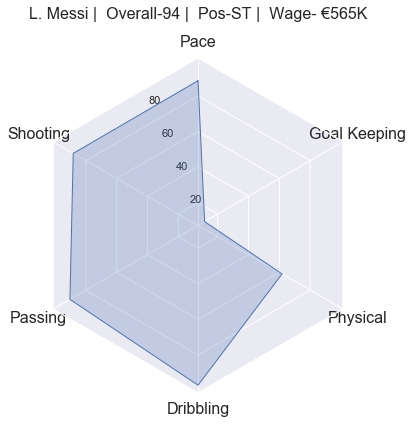

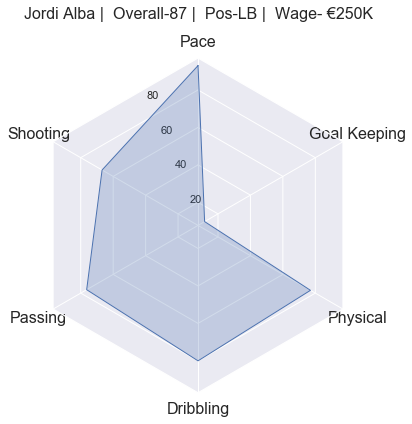

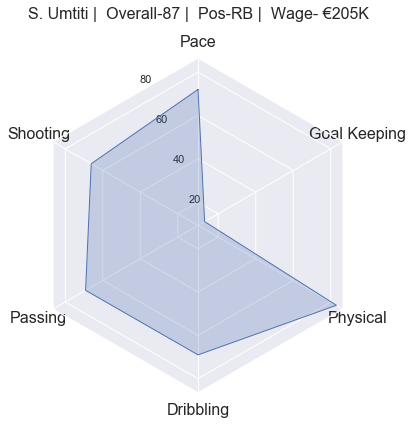

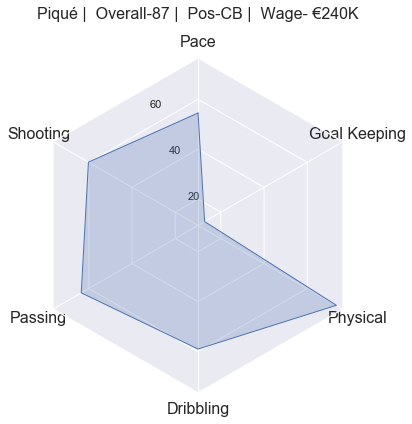

In [71]:
for k in satisfied.keys():
    radarPlot(satisfied[k], save=True, fname='FC_Barcelona_Long_passing')

### Senario 2 - Juventus & Crossing, players from the current team are not good enough, need recommendation from the whole market

In [72]:
def recommendPlayers(data, positions, budgets=[], threshold=0, top=5, team='None'):
    '''
    This function recommend the players according to the given positions and corresponding budgets
    
    param data: DataFrame
    param positions: the positions needed
    param budgets: the budgets correspond to each of the players
    param threshold: threshold value for selecting players
    param top: top number of players of output
    param team: prevent from recommending players from the given team
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(positions, list) and len(positions)>0
    assert isinstance(budgets, list) and (len(budgets) == 0 or len(positions) == len(budgets))
    assert isinstance(threshold, int) and threshold>=0
    assert isinstance(top, int) and top>0
    assert isinstance(team, str)
    
    if len(budgets)==0:
        budgets = [data['Wage'].max()]*len(positions)
    
    found = dict()
    notFound = set()
    
    for i in range(len(positions)):
        curThres = data[positions[i]].median() if threshold == 0 else threshold
        
        if team != 'None':
            candidate = data.loc[(data['Club']!=team) & (data['Position']==positions[i]) & (data[positions[i]]>=curThres) & (data['Wage']<=budgets[i])].sort_values(by=[positions[i]], ascending=False)
        else:
            candidate = data.loc[(data[positions[i]]>=curThres) & (data['Position']==positions[i]) & (data['Wage']<=budgets[i])].sort_values(by=[positions[i]], ascending=False)
       
        if len(candidate)>top:
            candidate = candidate.head(top)
        candidate['Position'] = positions[i]
        if len(candidate) == 0:
            notFound.add(positions[i])
        else:
            found[positions[i]] = candidate
    
    return found, notFound

In [73]:
satisfied, unsatisfied = tacticsFormation(dat, 'Juventus', 'Crossing', threshold=85)
print('Recommended Formation:')
for k in satisfied.keys():
    print(satisfied[k]['Position'].values, ' ', satisfied[k]['Name'].values)
    
print('\nStill need:')
print(unsatisfied)

Recommended Formation:
['ST']   ['Cristiano Ronaldo']
['LW']   ['P. Dybala']
['RW']   ['Douglas Costa']

Still need:
['RM', 'LM']


/Applications/DevelopTools/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [74]:
found, notFound = recommendPlayers(dat, unsatisfied, [], threshold=80, top=3, team='Juventus')
print('Find player for following positions:')
for k in found.keys():
    print(k + ':')
    print(found[k]['Name'])
    print('\n')

print('Positions without suitable players:')
print(notFound)

Find player for following positions:
RM:
25      K. Mbappé
26       M. Salah
122    F. Thauvin
Name: Name, dtype: object


LM:
68       M. Reus
86          Koke
97    I. Perišić
Name: Name, dtype: object


Positions without suitable players:
set()


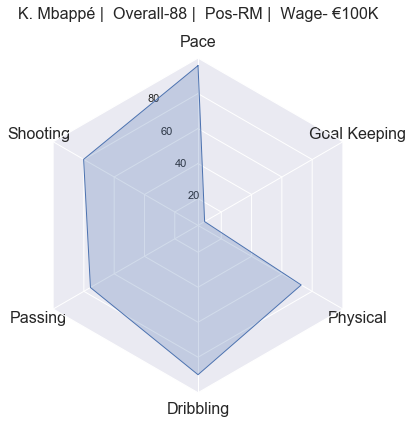

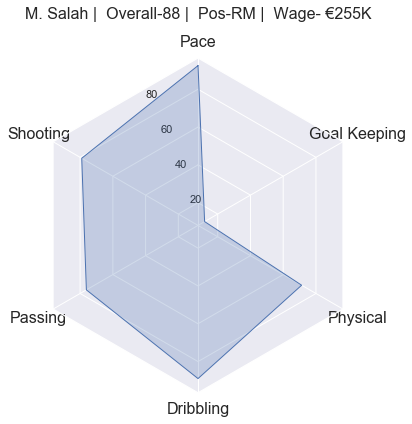

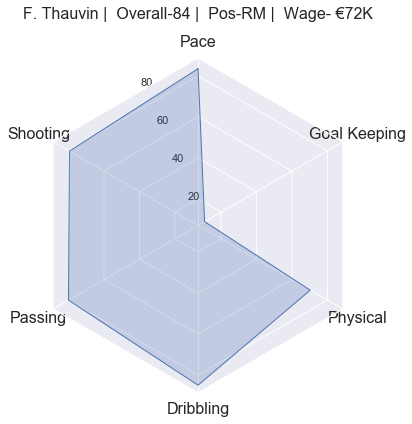

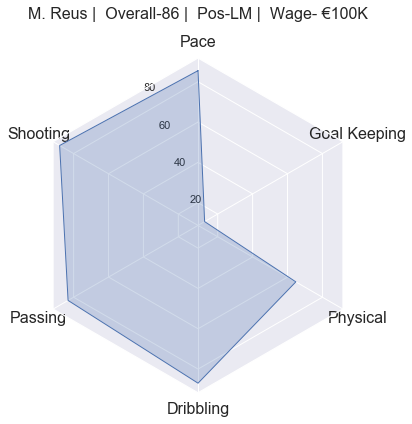

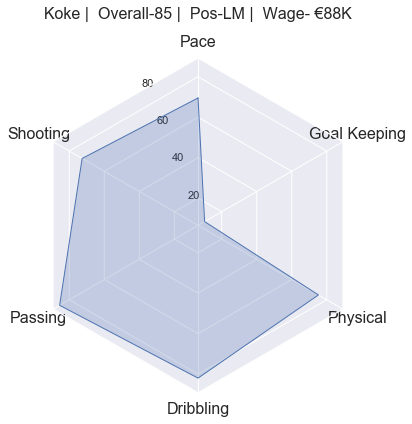

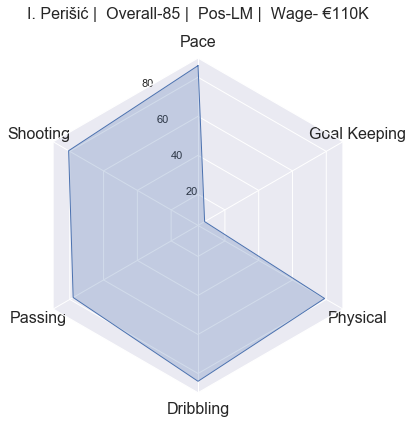

In [75]:
for k in found.keys():
    radarPlot(found[k], save=True, fname=k)

### ML Model - Team clustering

In [76]:
from sklearn.cluster import KMeans
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

/Applications/DevelopTools/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


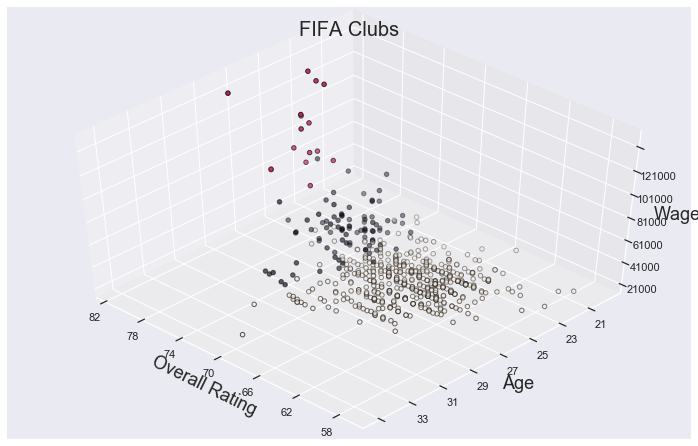

In [77]:
teams_fifa = data[['Club', 'Age', 'Overall', 'Wage']] # Value, Wage, Height, Weight, Release Clause
# convert player wages to sensible units
# remove euro sign
wages = teams_fifa.Wage.apply(lambda x: x[1:])
# convert M and K by their respective multipliers
teams_fifa.Wage = wages.apply(lambda x: float(x[:-1])*1e6 if "m" in x.lower() else (float(x[:-1])*1000 if "k" in x.lower() else float(x)))

teams = teams_fifa.set_index('Club')
teams = teams.groupby('Club').median()

X = teams.values

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=18) 
plt.rcParams.update({'font.size': 8})

fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
est = KMeans(n_clusters=3)
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 1], X[:, 0], X[:, 2],
       c=labels.astype(float), edgecolor='k')

min_0 = int(X[:,0].min())
max_0 = int(X[:,0].max())
min_1 = int(X[:,1].min())
max_1 = int(X[:,1].max())
min_2 = int(X[:,2].min())
max_2 = int(X[:,2].max())

ax.w_xaxis.set_ticklabels(range(min_1, max_1, 4))
ax.w_yaxis.set_ticklabels(range(min_0, max_0, 2))
ax.w_zaxis.set_ticklabels(range(min_2, max_2, 20000))
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Age')
ax.set_zlabel('Wage')
ax.set_title('FIFA Clubs')
                    
plt.show()